In [72]:
# testalgo = 'hbbft'
testalgo1 = 'hbbft'
testrun1 = 'run8'
testname1 = 'throughput2' # 'throughput1' or 'throughput2'


testalgo2 = 'hbbft'
testrun2 = 'run8'
testname2 = testname1  # most of the time we wan't to compare the same tests against each other.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# We use larger plot areas, adjust to your needs.
plt.rcParams["figure.figsize"] = (25, 15)

import seaborn as sns
sns.set(style="darkgrid")



In [74]:

def addCalcedColumns(df):
    df['blockTime'] =  df.timestamp - df.shift(1).timestamp
    df['txs'] = df.numberOfTransactions / df.blockTime
    df['blockTimeSinceStart'] =  df.timestamp - df.timestamp.min()

#blocksFile = 'data/' + testalgo + '/' + testrun + '/' + testname + '/blocks.log.csv'

# blocksFile = 'data/hbbft/proofs/poolProtection/blocks.log.csv'

blocksFile1 = 'data/' + testalgo1 + '/' + testrun1 + '/' + testname1 + '/blocks.blocks.csv'
blocksFile2 = 'data/' + testalgo2 + '/' + testrun2 + '/' + testname2 + '/blocks.blocks.csv'


df1 = pd.read_csv(blocksFile1)
df2 = pd.read_csv(blocksFile2)


addCalcedColumns(df1)
addCalcedColumns(df2)


# 1585951074

df1

,blockNumber,numberOfTransactions,gasUsed,timestamp,size,blockTime,txs,blockTimeSinceStart
0,907,4,84000,1586080770,997,NaN,NaN,0
1,908,82,1722000,1586080771,9108,1.0,82.0,1
2,909,175,3675000,1586080772,18780,1.0,175.0,2
3,910,203,4263000,1586080773,21693,1.0,203.0,3
4,911,364,7644000,1586080774,38433,1.0,364.0,4
...,...,...,...,...,...,...,...,...
207,1114,202,4242000,1586081068,21589,1.0,202.0,298
208,1115,582,12222000,1586081070,61098,2.0,291.0,300
209,1116,952,19992000,1586081071,99582,1.0,952.0,301
210,1117,159,3339000,1586081072,17115,1.0,159.0,302


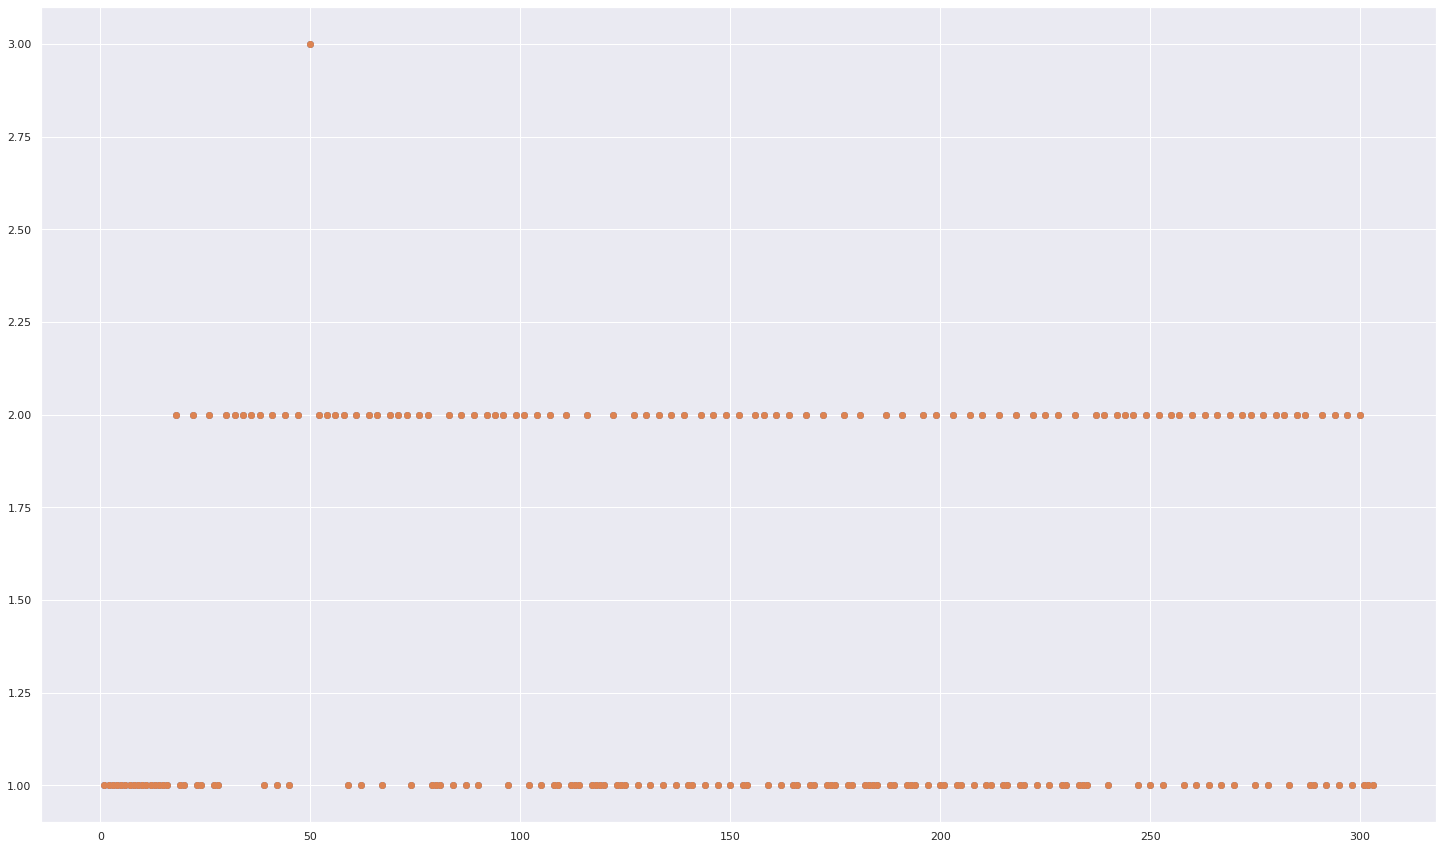

In [75]:
#blocktime chart.

plt.scatter(df1.blockTimeSinceStart, df1.blockTime)
plt.scatter(df2.blockTimeSinceStart, df2.blockTime)

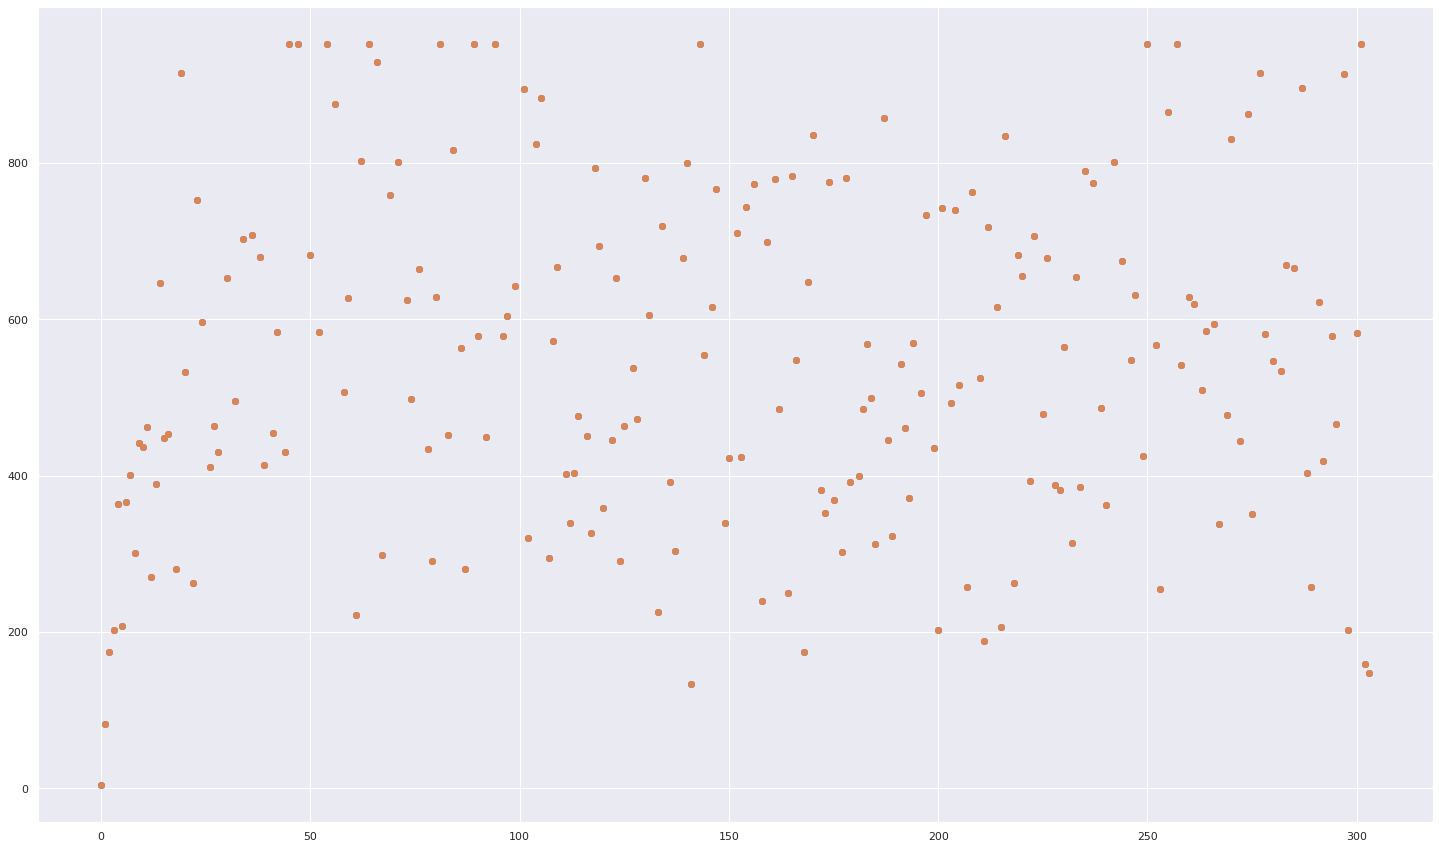

In [76]:
#transactions per block.

plt.scatter(df1.blockTimeSinceStart, df1.numberOfTransactions.rolling(window=1).mean())
#plt.plot(dfHbbft.numberOfTransactions.rolling(window=9).mean())

plt.scatter(df2.blockTimeSinceStart, df2.numberOfTransactions.rolling(window=1).mean())
#plt.plot(dfAura.numberOfTransactions.rolling(window=9).mean())


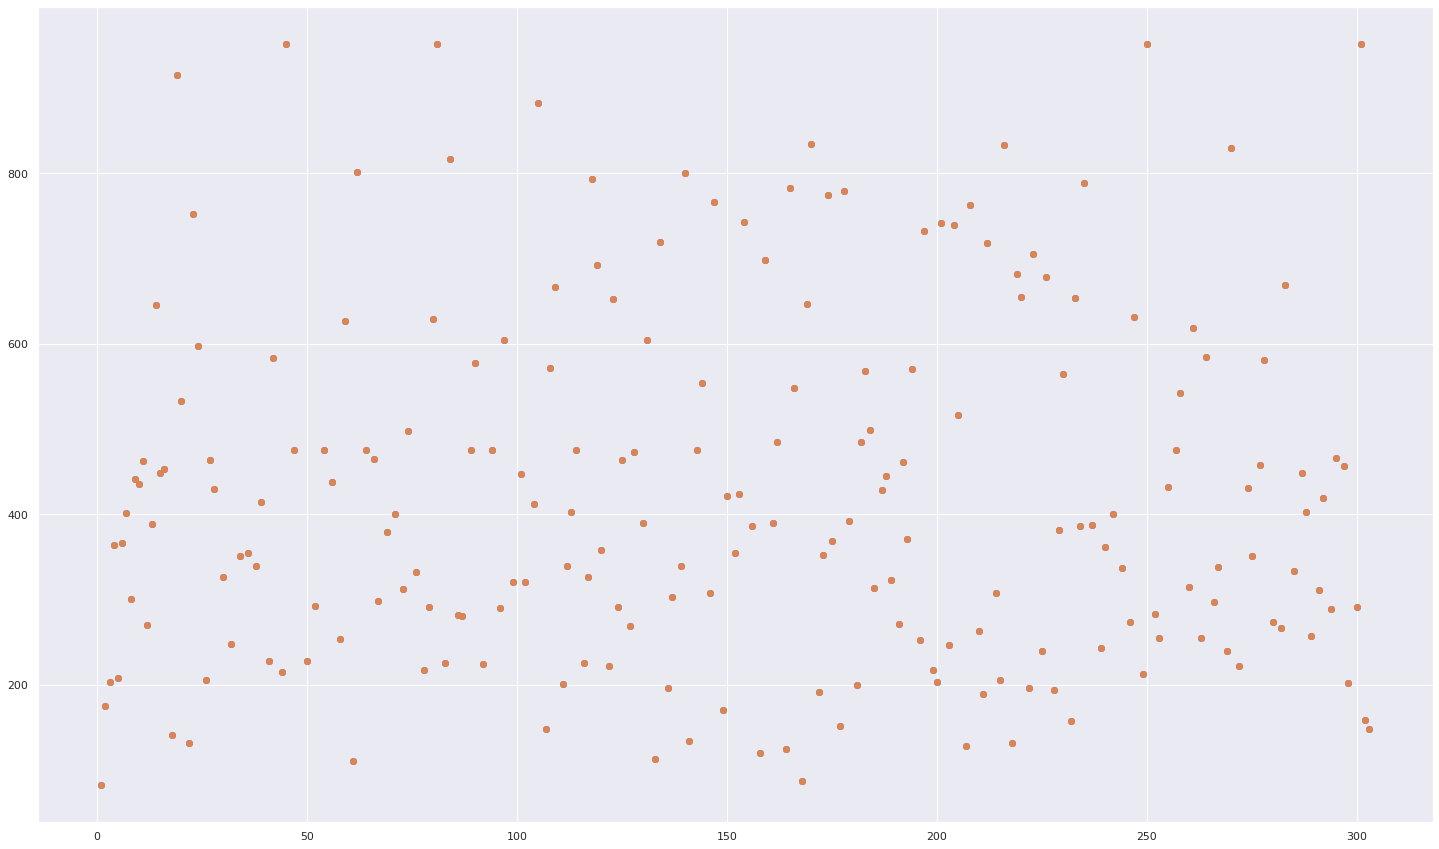

In [77]:
#plt.plot(df3.txs)
plt.scatter(df1.blockTimeSinceStart, df1.txs.rolling(window=1).mean())

#plt.plot(df4.txs)
plt.scatter(df2.blockTimeSinceStart, df2.txs.rolling(window=1).mean())


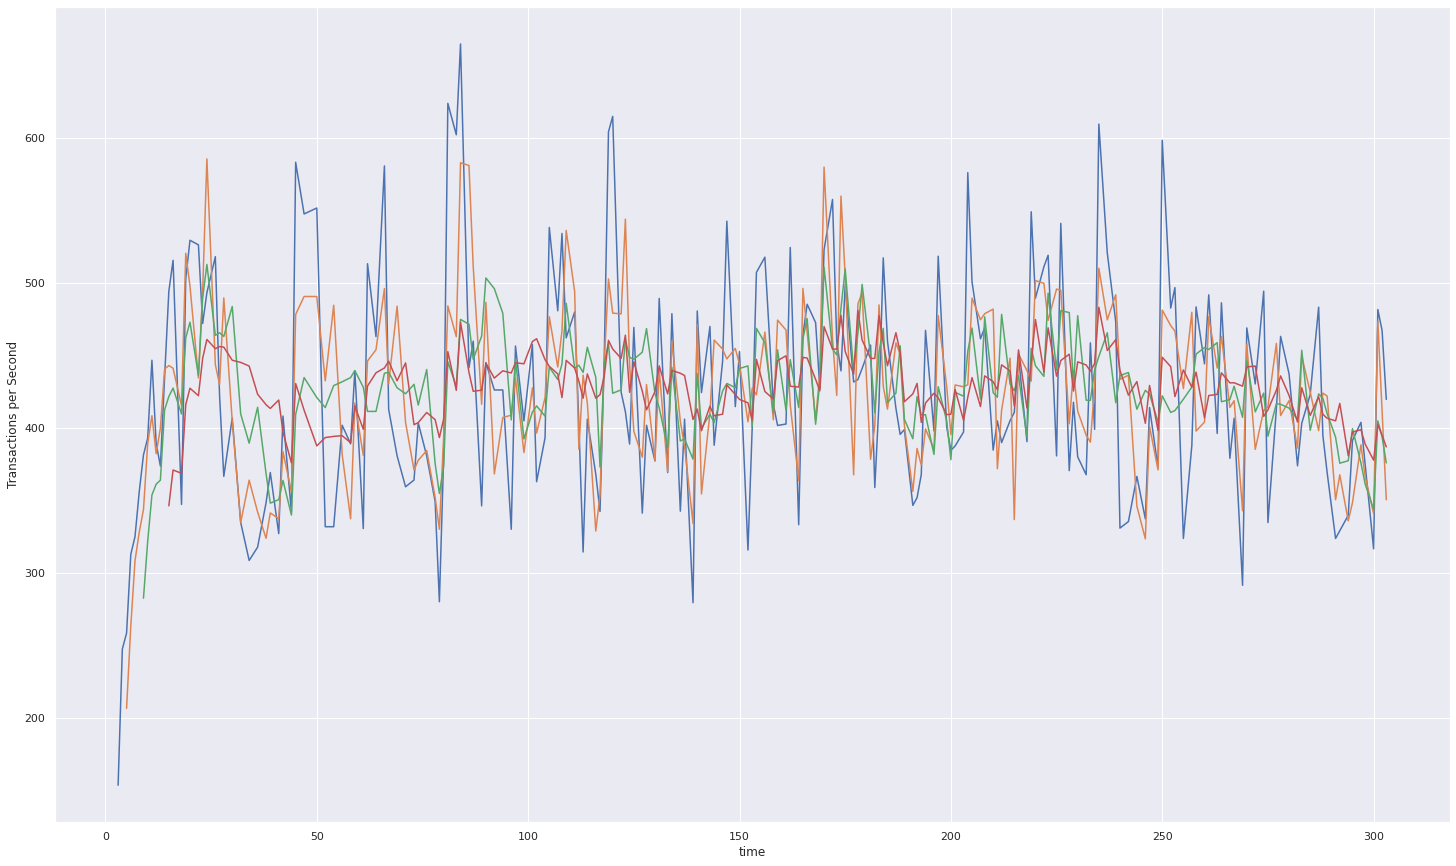

In [78]:
    #plt.plot(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
    
    #plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=1).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=3).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=5).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=9).mean())
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=15).mean())

    plt.xlabel('time')
    plt.ylabel('Transactions per Second')

    # major_ticks = np.arange(0, 23, 1)
    # plt.yticks(major_ticks)

    plt.ticklabel_format(style='plain')
    

In [79]:
# transactions per second


def printWithWindowSize(windowSize):
    #plt.plot(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
    plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=windowSize).mean(), label='7 txs all 18 ms')

    plt.xlabel('time')
    plt.ylabel('Transactions per Second')

    # major_ticks = np.arange(0, 23, 1)
    # plt.yticks(major_ticks)

    plt.ticklabel_format(style='plain')
    plt.legend()
    






# plotet.write_html('output/throughput' + windowSize +'.html')


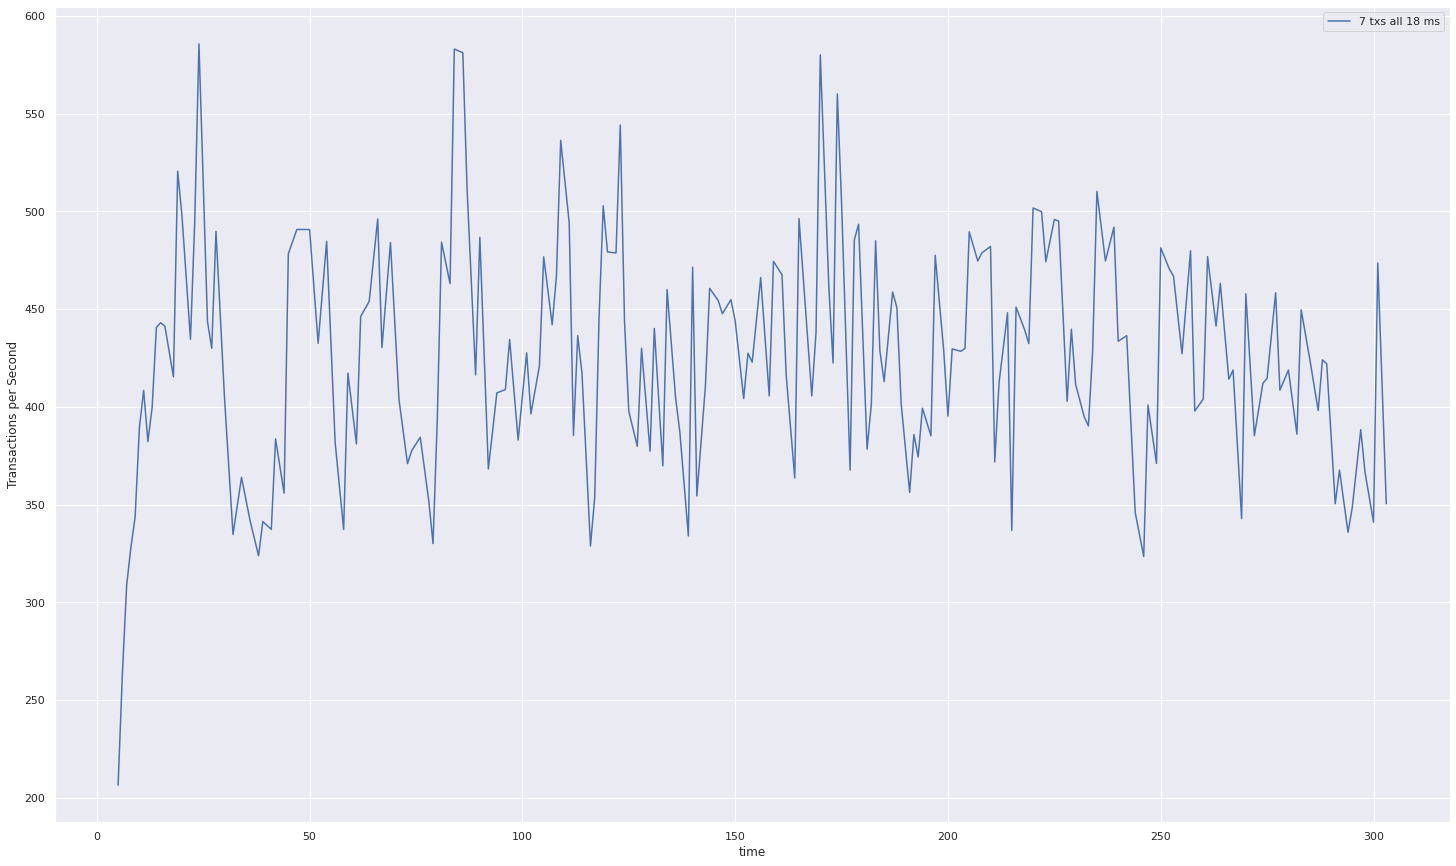

In [80]:
 
printWithWindowSize(5)


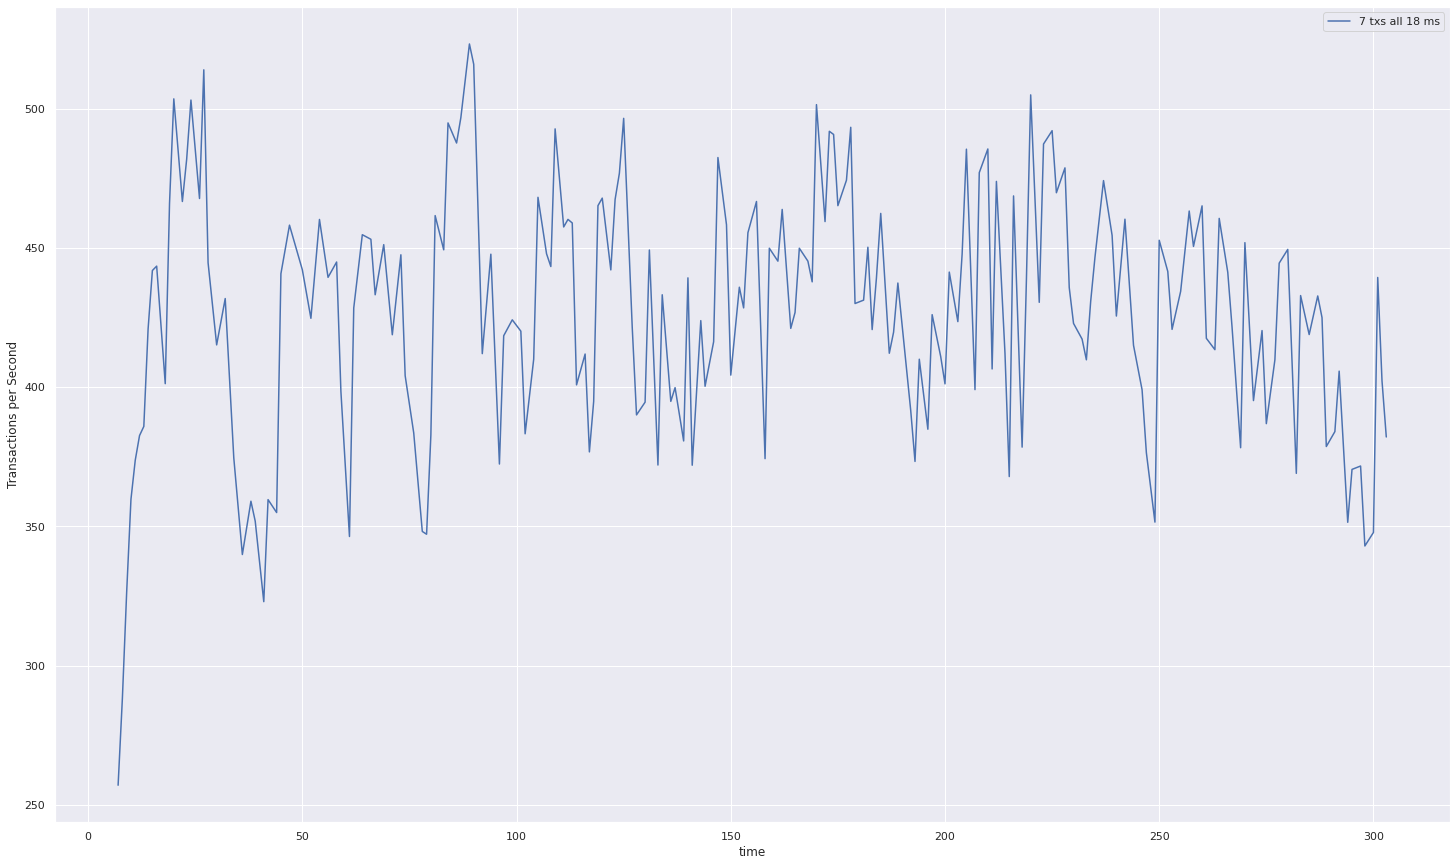

In [81]:
 
printWithWindowSize(7)


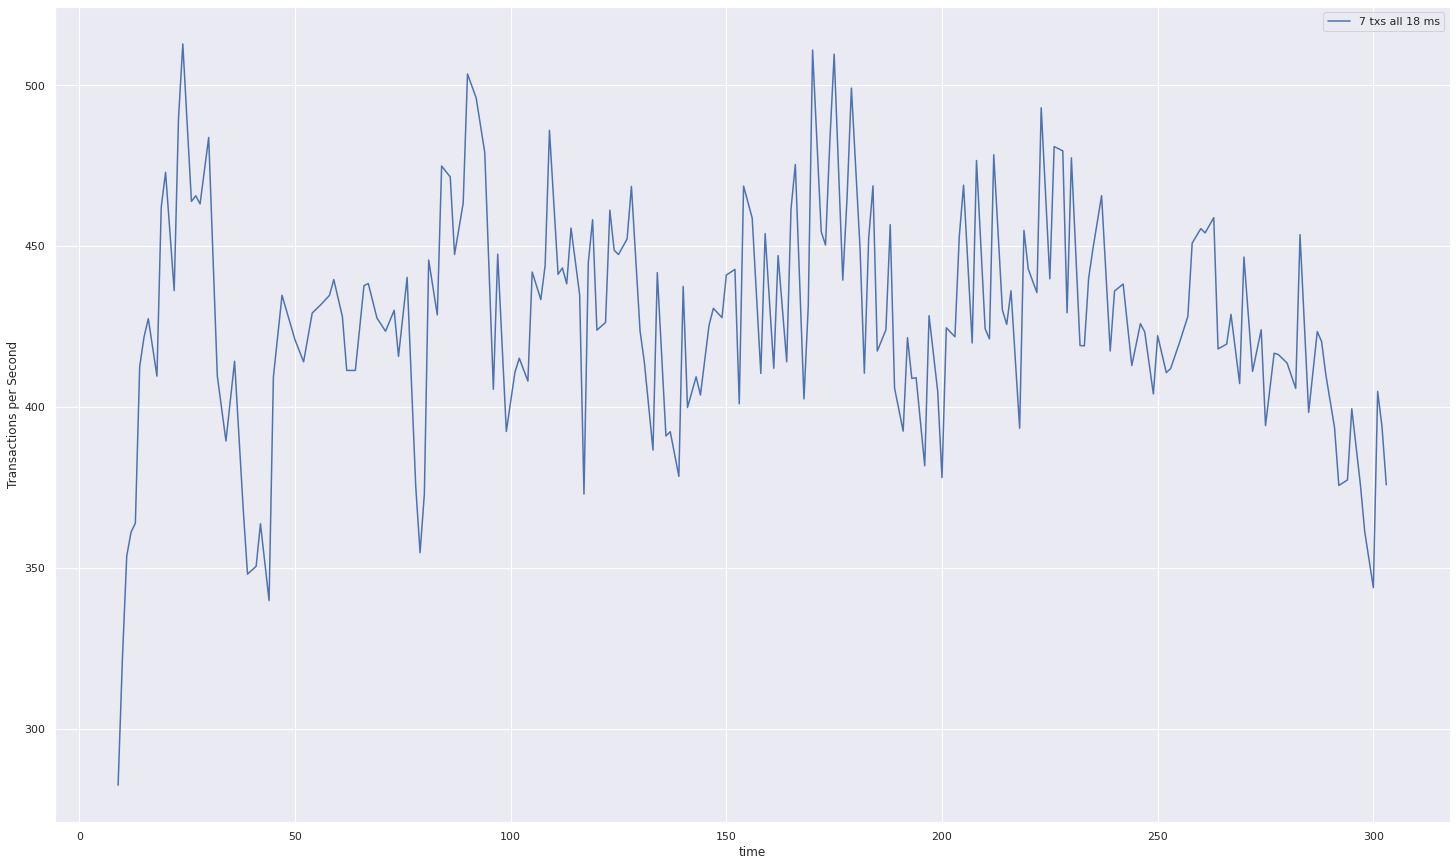

In [82]:
 
printWithWindowSize(9)


In [83]:
windowSize = 5

x = (df1.blockTimeSinceStart, df1.txs.rolling(window=windowSize).min(), df1.txs.rolling(window=windowSize).mean())
x

(0        0
 1        1
 2        2
 3        3
 4        4
       ... 
 207    298
 208    300
 209    301
 210    302
 211    303
 Name: blockTimeSinceStart, Length: 212, dtype: int64,
 0        NaN
 1        NaN
 2        NaN
 3        NaN
 4        NaN
        ...  
 207    202.0
 208    202.0
 209    202.0
 210    159.0
 211    148.0
 Name: txs, Length: 212, dtype: float64,
 0        NaN
 1        NaN
 2        NaN
 3        NaN
 4        NaN
        ...  
 207    366.5
 208    340.9
 209    473.5
 210    412.1
 211    350.4
 Name: txs, Length: 212, dtype: float64)

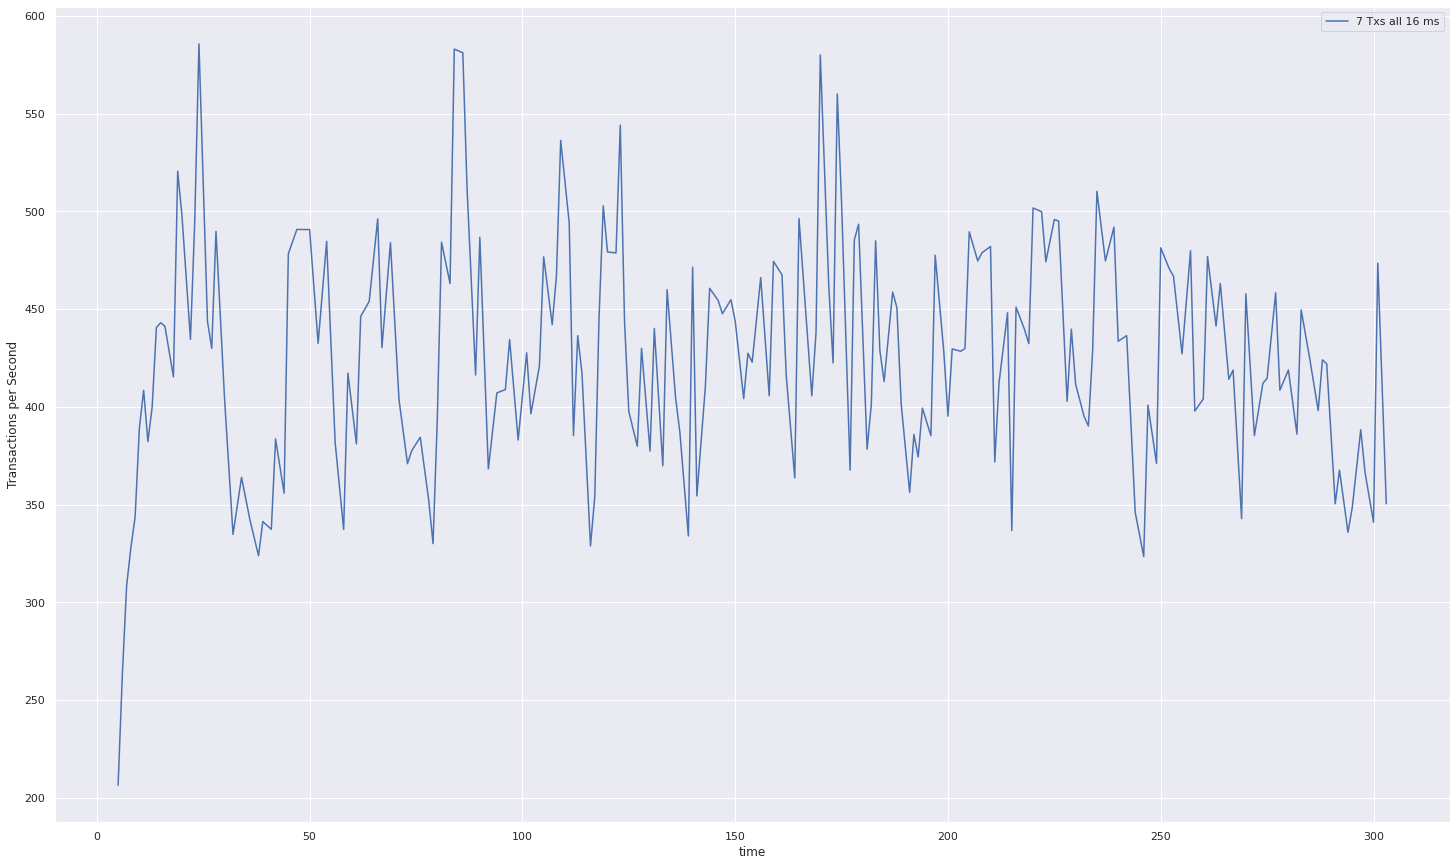

In [84]:
# transactions per second

arange = 8




plt.errorbar(df1.blockTimeSinceStart, df1.txs.rolling(window=5).mean(), label='7 Txs all 16 ms')
#plt.plot(df2.blockTimeSinceStart, df2.txs.rolling(window=5).mean(), label='7 txs all 18 ms')

plt.xlabel('time')
plt.ylabel('Transactions per Second')

# major_ticks = np.arange(0, 23, 1)
# plt.yticks(major_ticks)

plt.ticklabel_format(style='plain')
plt.legend()


In [85]:
df2.txs.mean()


421.70063191153235